In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load train dataset, stoich45, ofm feature sets and merge

In [204]:
# Load the training dataset
df_train = pd.read_csv('../data/datasets_main/train_hse06.csv', sep=',')

# Load one of the fingerprints datasets
df_stoich45 = pd.read_csv('../data/QMOF/qmof_database/qmof_database/relaxed_structures_fingerprints/stoich45_fingerprints.csv', sep=',')

# Merge the two datasets on the 'qmof_id' and 'MOF' columns, drop 'qmod_id' column
df_train_stoich45 = pd.merge(df_stoich45, df_train, left_on='MOF', right_on='qmof_id', how='right')

# Import another 'fingerprint' dataset
df_ofm = pd.read_csv('../data/QMOF/qmof_database/qmof_database/relaxed_structures_fingerprints/ofm_fingerprints.csv', sep=',')
df_train_ofm = pd.merge(df_ofm, df_train, left_on='MOF', right_on='qmof_id', how='right')

# Merge the two datasets on the 'MOF' column and as new DataFrame
df_train_stoich45_ofm_initial = df_train_stoich45.merge(df_ofm)
df_train_stoich45_ofm_initial


,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,OFM: period 7 - f^12,OFM: period 7 - f^13,OFM: period 7 - f^14,OFM: period 7 - period 1,OFM: period 7 - period 2,OFM: period 7 - period 3,OFM: period 7 - period 4,OFM: period 7 - period 5,OFM: period 7 - period 6,OFM: period 7 - period 7
0,qmof-755b963,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,qmof-431c61c,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qmof-0954b37,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,qmof-6994eb7,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,qmof-1eea8fc,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,qmof-46a3716,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8644,qmof-b2fb769,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8645,qmof-4a920a2,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8646,qmof-0f4d4bb,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA analysis

### 1. For combined stoich45 + ofm

In [205]:
# 1- Preprocessing

# Drop column names with 'info' in them
df_train_stoich45_ofm = df_train_stoich45_ofm_initial.drop(columns=[col for col in df_train_stoich45_ofm.columns if 'info' in col])

# Print NaN values in the DataFrame
print(df_train_stoich45_ofm.isna().sum())

# Printa column names with NaN values
print(df_train_stoich45_ofm.columns[df_train_stoich45_ofm.isna().any()].tolist())

# Remove rows with NaN values and create a new DataFrame
df_train_stoich45_ofm_for_pca = df_train_stoich45_ofm.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_train_stoich45_ofm.shape[0] - df_train_stoich45_ofm_for_pca.shape[0])

# Print the shape of the new DataFrame
print('number of rows and columns after dropping NaNs:', df_train_stoich45_ofm_for_pca.shape)


MOF                              0
atomic_num_mean                  0
atomic_num_geometric_mean        0
atomic_num_standard_deviation    0
atomic_num_max                   0
                                ..
OFM: period 7 - period 3         0
OFM: period 7 - period 4         0
OFM: period 7 - period 5         0
OFM: period 7 - period 6         0
OFM: period 7 - period 7         0
Length: 1570, dtype: int64
['electronegativity_mean', 'electronegativity_geometric_mean', 'electronegativity_standard_deviation', 'electronegativity_max', 'electronegativity_min', 'electron_affinity_mean', 'electron_affinity_geometric_mean', 'electron_affinity_standard_deviation', 'electron_affinity_max', 'electron_affinity_min']
number of rows dropped: 294
number of rows and columns after dropping NaNs: (8354, 1570)


In [206]:
# 2- Preprocessing

# Drop columns where the count of zeros is greater than half of the total rows and as new DataFrame
df_train_stoich45_ofm_for_pca_filtered = df_train_stoich45_ofm_for_pca.loc[:, (df_train_stoich45_ofm_for_pca != 0).sum(axis=0) > (df_train_stoich45_ofm_for_pca.shape[0] / 2)]

df_train_stoich45_ofm_for_pca_filtered


,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,OFM: period 2 - p^4,OFM: period 2 - p^6,OFM: period 2 - d^10,OFM: period 2 - period 1,OFM: period 2 - period 2,OFM: period 2 - period 4,OFM: period 4 - s^1,OFM: period 4 - s^2,OFM: period 4 - period 1,OFM: period 4 - period 2
0,qmof-755b963,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,...,0.052194,0.031762,0.031762,0.226107,0.490076,0.031762,0.000374,0.020829,0.000374,0.020829
1,qmof-431c61c,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,...,0.038477,0.016521,0.016521,0.247129,0.461491,0.016521,0.000467,0.012397,0.000467,0.012397
2,qmof-0954b37,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,...,0.078526,0.023453,0.023453,0.223165,0.507855,0.000000,0.000000,0.000000,0.000000,0.000000
3,qmof-6994eb7,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,...,0.039905,0.015144,0.015144,0.139646,0.488400,0.015144,0.001962,0.025658,0.001962,0.009503
4,qmof-1eea8fc,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,...,0.030378,0.015501,0.015501,0.268560,0.396819,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,qmof-46a3716,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,...,0.000000,0.077490,0.000000,0.220007,0.411302,0.077490,0.002591,0.044658,0.002591,0.044658
8644,qmof-b2fb769,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,...,0.013500,0.027247,0.027247,0.222912,0.386468,0.027247,0.000884,0.020607,0.000884,0.020607
8645,qmof-4a920a2,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,...,0.000000,0.040228,0.000000,0.184077,0.603615,0.040228,0.000071,0.021533,0.000071,0.021533
8646,qmof-0f4d4bb,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,...,0.083153,0.000000,0.000000,0.289539,0.420717,0.033230,0.000140,0.015153,0.000140,0.015153


In [207]:
# 3- Preprocessing

# Select numerical columns for PCA
numerical_cols = df_train_stoich45_ofm_for_pca_filtered.select_dtypes(include=['float64', 'int64']).columns
df_train_stoich45_ofm_for_pca_filtered = df_train_stoich45_ofm_for_pca_filtered[numerical_cols]
df_train_stoich45_ofm_for_pca_filtered

,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,group_num_min,...,OFM: period 2 - p^4,OFM: period 2 - p^6,OFM: period 2 - d^10,OFM: period 2 - period 1,OFM: period 2 - period 2,OFM: period 2 - period 4,OFM: period 4 - s^1,OFM: period 4 - s^2,OFM: period 4 - period 1,OFM: period 4 - period 2
0,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,1.0,...,0.052194,0.031762,0.031762,0.226107,0.490076,0.031762,0.000374,0.020829,0.000374,0.020829
1,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,1.0,...,0.038477,0.016521,0.016521,0.247129,0.461491,0.016521,0.000467,0.012397,0.000467,0.012397
2,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,1.0,...,0.078526,0.023453,0.023453,0.223165,0.507855,0.000000,0.000000,0.000000,0.000000,0.000000
3,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,1.0,...,0.039905,0.015144,0.015144,0.139646,0.488400,0.015144,0.001962,0.025658,0.001962,0.009503
4,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,1.0,...,0.030378,0.015501,0.015501,0.268560,0.396819,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,1.0,...,0.000000,0.077490,0.000000,0.220007,0.411302,0.077490,0.002591,0.044658,0.002591,0.044658
8644,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,1.0,...,0.013500,0.027247,0.027247,0.222912,0.386468,0.027247,0.000884,0.020607,0.000884,0.020607
8645,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,1.0,...,0.000000,0.040228,0.000000,0.184077,0.603615,0.040228,0.000071,0.021533,0.000071,0.021533
8646,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,1.0,...,0.083153,0.000000,0.000000,0.289539,0.420717,0.033230,0.000140,0.015153,0.000140,0.015153


Explained Variance Ratio: [2.11676497e-01 1.68456409e-01 1.44811537e-01 1.09250451e-01
 5.67186843e-02 4.75272578e-02 2.74263306e-02 2.60930745e-02
 2.12089591e-02 1.94391933e-02 1.78320951e-02 1.64743357e-02
 1.53388664e-02 1.24862097e-02 1.05111366e-02 9.63455092e-03
 9.01089692e-03 8.71321679e-03 7.51317054e-03 6.23101413e-03
 5.53022123e-03 5.27925671e-03 4.63641639e-03 4.23162367e-03
 3.45347860e-03 3.27809224e-03 2.97286564e-03 2.42765282e-03
 2.09989533e-03 1.94175846e-03 1.73913444e-03 1.65810433e-03
 1.34067170e-03 1.20808208e-03 1.08560969e-03 9.71789382e-04
 9.01193308e-04 8.67974330e-04 7.68410802e-04 7.46306331e-04
 6.07221150e-04 5.40777049e-04 4.54296539e-04 4.24650043e-04
 4.07474895e-04 3.84537960e-04 3.22947679e-04 2.81370131e-04
 2.69679610e-04 2.47573027e-04 2.31207156e-04 2.00163653e-04
 1.88953037e-04 1.74217909e-04 1.63319299e-04 1.44508748e-04
 1.42682644e-04 1.37414021e-04 1.13978381e-04 1.06042257e-04
 9.69597776e-05 8.31071662e-05 7.50455171e-05 7.21200628e-0

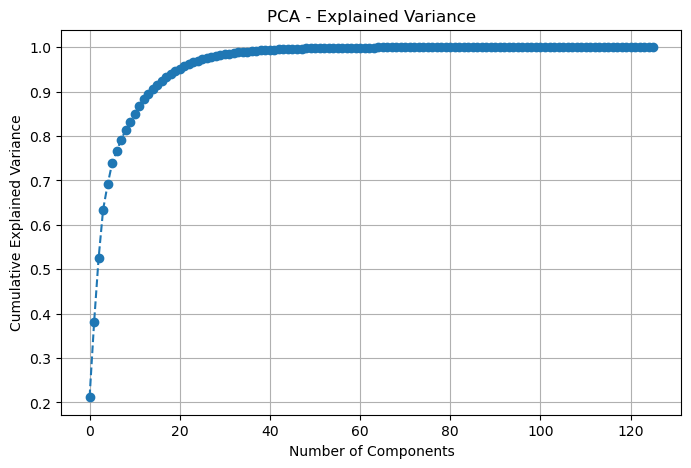

In [208]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_train_stoich45_ofm_for_pca_filtered.drop(columns=['outputs.hse06.bandgap'])
y = df_train_stoich45_ofm_for_pca_filtered['outputs.hse06.bandgap']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio (importance of each component)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative variance to decide number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()

# Get feature importance based on PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_importance = pd.DataFrame(loadings, index=X.columns, columns=[f"PC{i+1}" for i in range(len(explained_variance))])

# Select important features (e.g., features with high loadings in first few PCs)
important_features = feature_importance[abs(feature_importance).sum(axis=1) > 0.5]
print("Important Features based on PCA Loadings:")
print(important_features)


In [209]:
# Print the number and column name of the 40 most important features
print("Number of important features:", important_features.shape[0])
print("Column names of the 40 most important features:", important_features.index[:40].tolist())

# Check if there are any columns of the column name containing 'OFM' among the 40 most important features, and print the length of the list
ofm_columns = [col for col in important_features.index[:40] if 'OFM' in col]
print("Number of OFM columns among the 40 most important features:", len(ofm_columns))
print("OFM columns among the 40 most important features:", ofm_columns)

Number of important features: 119
Column names of the 40 most important features: ['atomic_num_mean', 'atomic_num_geometric_mean', 'atomic_num_standard_deviation', 'atomic_num_max', 'group_num_mean', 'group_num_geometric_mean', 'group_num_standard_deviation', 'group_num_max', 'period_num_mean', 'period_num_geometric_mean', 'period_num_standard_deviation', 'period_num_max', 'electronegativity_mean', 'electronegativity_geometric_mean', 'electronegativity_standard_deviation', 'electronegativity_max', 'electronegativity_min', 'electron_affinity_mean', 'electron_affinity_geometric_mean', 'electron_affinity_standard_deviation', 'electron_affinity_max', 'electron_affinity_min', 'melting_mean', 'melting_geometric_mean', 'melting_standard_deviation', 'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation', 'boiling_max', 'density_mean', 'density_geometric_mean', 'density_standard_deviation', 'density_max', 'ionization_energy_mean', 'ionization_energy_geometric_mean', 'ionization_

<div class="alert alert-block alert-info">
<b>SN:</b> Among the most important features 38 columns are from stoich45 and only 2 columns from ofm. At this point, it will make more sense to perform separate PCA on each of the stoich45 and ofm fingerprints and combine the residual result.
</div>


### 2. For residual features from separate PCA analysis on stoich45 and ofm

following Simran's and Qinying's analysis,

## stoich45

In [210]:
# 1- Preprocessing stoich45 dataset

# Drop column names with 'info' in them
df_train_stoich45 = df_train_stoich45.drop(columns=[col for col in df_train_stoich45.columns if 'info' in col])

# Print NaN values in the DataFrame
print(df_train_stoich45.isna().sum())

# Printa column names with NaN values
print(df_train_stoich45.columns[df_train_stoich45.isna().any()].tolist())

# Remove rows with NaN values and create a new DataFrame
df_train_stoich45_for_pca = df_train_stoich45.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_train_stoich45.shape[0] - df_train_stoich45_for_pca.shape[0])

# Print the shape of the new DataFrame
print('number of rows and columns after dropping NaNs:', df_train_stoich45_for_pca.shape)

MOF                                       0
atomic_num_mean                           0
atomic_num_geometric_mean                 0
atomic_num_standard_deviation             0
atomic_num_max                            0
atomic_num_min                            0
group_num_mean                            0
group_num_geometric_mean                  0
group_num_standard_deviation              0
group_num_max                             0
group_num_min                             0
period_num_mean                           0
period_num_geometric_mean                 0
period_num_standard_deviation             0
period_num_max                            0
period_num_min                            0
electronegativity_mean                  174
electronegativity_geometric_mean        174
electronegativity_standard_deviation    174
electronegativity_max                   174
electronegativity_min                   174
electron_affinity_mean                  120
electron_affinity_geometric_mean

In [211]:
# 2- Preprocessing stoich45 dataset

# Drop columns where the count of zeros is greater than half of the total rows and as new DataFrame
df_train_stoich45_for_pca_filtered = df_train_stoich45_for_pca.loc[:, (df_train_stoich45_for_pca != 0).sum(axis=0) > (df_train_stoich45_for_pca.shape[0] / 2)]

df_train_stoich45_for_pca_filtered


,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,inputs.hse06.theory,outputs.hse06.bandgap,qmof_id
0,qmof-755b963,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,...,7140.0,0.0899,1242.297436,1230.382793,176.391285,1681.0,906.4,HSE06,4.988289,qmof-755b963
1,qmof-431c61c,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,...,7140.0,0.0899,1211.885075,1205.248668,125.737828,1402.3,906.4,HSE06,3.196302,qmof-431c61c
2,qmof-0954b37,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,...,6640.0,0.0899,1189.528358,1179.733477,138.723910,1313.9,527.0,HSE06,3.617418,qmof-0954b37
3,qmof-6994eb7,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,...,8960.0,0.0899,1218.734286,1200.893137,213.381748,1681.0,745.5,HSE06,3.220291,qmof-6994eb7
4,qmof-1eea8fc,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,...,10490.0,0.0899,1209.042308,1201.039588,133.111739,1402.3,731.0,HSE06,2.436139,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,qmof-46a3716,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,...,8908.0,0.0899,1213.138889,1199.508201,171.411605,1402.3,737.1,HSE06,3.605205,qmof-46a3716
8644,qmof-b2fb769,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,...,8960.0,0.0899,1194.932558,1186.105426,140.057370,1402.3,745.5,HSE06,3.776886,qmof-b2fb769
8645,qmof-4a920a2,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,...,7470.0,0.0899,1289.905714,1278.165331,159.477558,1402.3,717.3,HSE06,3.880014,qmof-4a920a2
8646,qmof-0f4d4bb,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,...,2260.0,0.0899,1237.553191,1226.712844,146.275710,1402.3,589.8,HSE06,4.301264,qmof-0f4d4bb


In [212]:
# 3- Preprocessing

# Select numerical columns for PCA
numerical_cols = df_train_stoich45_for_pca_filtered.select_dtypes(include=['float64', 'int64']).columns
df_train_stoich45_for_pca_filtered = df_train_stoich45_for_pca_filtered[numerical_cols]
df_train_stoich45_for_pca_filtered

,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,group_num_min,...,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,outputs.hse06.bandgap
0,5.435897,3.685384,4.892668,30.0,1.0,10.102564,5.975021,6.511508,17.0,1.0,...,14.609889,1472.787091,7140.0,0.0899,1242.297436,1230.382793,176.391285,1681.0,906.4,4.988289
1,4.746269,3.268988,4.097117,30.0,1.0,9.373134,5.307604,6.491868,16.0,1.0,...,15.492118,1340.240936,7140.0,0.0899,1211.885075,1205.248668,125.737828,1402.3,906.4,3.196302
2,5.477612,3.613829,7.107613,59.0,1.0,10.134328,6.043493,6.448176,19.0,1.0,...,24.602673,1305.210435,6640.0,0.0899,1189.528358,1179.733477,138.723910,1313.9,527.0,3.617418
3,7.114286,4.942821,5.770721,29.0,1.0,11.628571,7.955079,5.923733,17.0,1.0,...,45.286607,1698.136217,8960.0,0.0899,1218.734286,1200.893137,213.381748,1681.0,745.5,3.220291
4,4.769231,2.906336,6.497382,47.0,1.0,8.384615,4.393251,6.613372,16.0,1.0,...,11.201458,1713.449386,10490.0,0.0899,1209.042308,1201.039588,133.111739,1402.3,731.0,2.436139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,1.0,9.611111,5.753521,6.223958,15.0,1.0,...,15.674195,2025.522185,8908.0,0.0899,1213.138889,1199.508201,171.411605,1402.3,737.1,3.605205
8644,5.651163,3.799867,4.969131,29.0,1.0,10.069767,6.045240,6.359009,16.0,1.0,...,21.534939,1619.661124,8960.0,0.0899,1194.932558,1186.105426,140.057370,1402.3,745.5,3.776886
8645,5.914286,4.491859,4.066388,25.0,1.0,11.342857,7.779733,5.786402,15.0,1.0,...,4.877498,1492.613111,7470.0,0.0899,1289.905714,1278.165331,159.477558,1402.3,717.3,3.880014
8646,4.893617,3.338422,3.668347,20.0,1.0,9.276596,5.059334,6.812698,16.0,1.0,...,5.099770,1035.965918,2260.0,0.0899,1237.553191,1226.712844,146.275710,1402.3,589.8,4.301264


Explained Variance Ratio: [2.57242122e-01 2.02924103e-01 1.23047320e-01 1.05601455e-01
 6.95113293e-02 5.64645452e-02 3.92934159e-02 2.94480211e-02
 2.50781105e-02 2.09020439e-02 1.17592633e-02 1.15790459e-02
 9.16785127e-03 7.53555476e-03 5.81844195e-03 5.36318294e-03
 3.60531319e-03 3.35773369e-03 2.66869839e-03 2.55085897e-03
 1.75391442e-03 1.56169889e-03 1.03896092e-03 8.90100077e-04
 6.16150289e-04 3.62589520e-04 2.50275319e-04 1.74688928e-04
 1.58089398e-04 1.25319340e-04 5.34927484e-05 2.79537245e-05
 2.47959535e-05 2.24771277e-05 9.30112399e-06 5.78480642e-06
 5.01218964e-06 9.85177830e-07 1.79469599e-17 3.53462090e-18
 9.71840033e-19 5.56824667e-34 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Important Features based on PCA Loadings:
                                           PC1       PC2       PC3       PC4  \
atomic_num_mean                       0.780161 -0.466344  0.296087 -0.120509   
atomic_num_geometric_mean             0.760714 -0.532967 -0.219765  0.165944   
atom

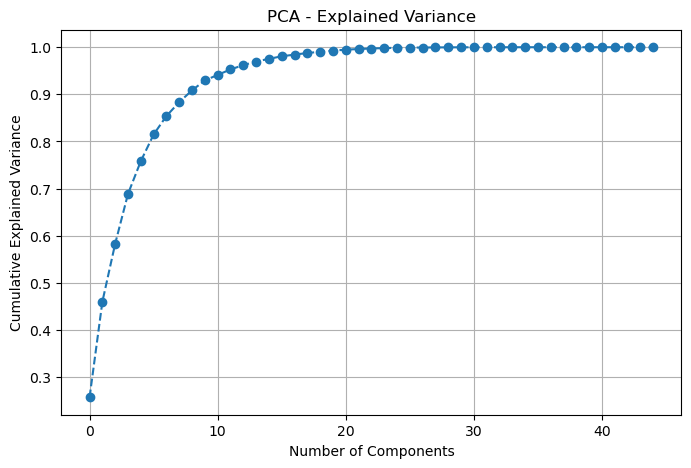

In [213]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_train_stoich45_for_pca_filtered.drop(columns=['outputs.hse06.bandgap'])
y = df_train_stoich45_for_pca_filtered['outputs.hse06.bandgap']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio (importance of each component)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative variance to decide number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()

# Get feature importance based on PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_importance = pd.DataFrame(loadings, index=X.columns, columns=[f"PC{i+1}" for i in range(len(explained_variance))])

# Select important features (e.g., features with high loadings in first few PCs)
important_features = feature_importance[abs(feature_importance).sum(axis=1) > 0.5]
print("Important Features based on PCA Loadings:")
print(important_features)


In [214]:
# Print the number and column name of the 10 most important features
print("Number of important features:", important_features.shape[0])
print("Column names of the 10 most important features:", important_features.index[:10].tolist())

Number of important features: 38
Column names of the 10 most important features: ['atomic_num_mean', 'atomic_num_geometric_mean', 'atomic_num_standard_deviation', 'atomic_num_max', 'group_num_mean', 'group_num_geometric_mean', 'group_num_standard_deviation', 'group_num_max', 'period_num_mean', 'period_num_geometric_mean']


In [215]:
# Filter the df_train_stoich45 DataFrame to keep only the important features
df_train_stoich45_filtered = df_train_stoich45_for_pca_filtered[important_features.index[:10].tolist()]
df_train_stoich45_filtered



,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,period_num_mean,period_num_geometric_mean
0,5.435897,3.685384,4.892668,30.0,10.102564,5.975021,6.511508,17.0,1.717949,1.615866
1,4.746269,3.268988,4.097117,30.0,9.373134,5.307604,6.491868,16.0,1.656716,1.560265
2,5.477612,3.613829,7.107613,59.0,10.134328,6.043493,6.448176,19.0,1.731343,1.619219
3,7.114286,4.942821,5.770721,29.0,11.628571,7.955079,5.923733,17.0,1.942857,1.823680
4,4.769231,2.906336,6.497382,47.0,8.384615,4.393251,6.613372,16.0,1.615385,1.498079
...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,9.611111,5.753521,6.223958,15.0,1.777778,1.649721
8644,5.651163,3.799867,4.969131,29.0,10.069767,6.045240,6.359009,16.0,1.767442,1.652765
8645,5.914286,4.491859,4.066388,25.0,11.342857,7.779733,5.786402,15.0,1.828571,1.741101
8646,4.893617,3.338422,3.668347,20.0,9.276596,5.059334,6.812698,16.0,1.659574,1.556492


## ofm

MOF                         0
OFM: s^1 - s^1              0
OFM: s^1 - s^2              0
OFM: s^1 - p^1              0
OFM: s^1 - p^2              0
                           ..
OFM: period 7 - period 6    0
OFM: period 7 - period 7    0
inputs.hse06.theory         0
outputs.hse06.bandgap       0
qmof_id                     0
Length: 1525, dtype: int64
[]
number of rows dropped: 0
number of rows and columns after dropping NaNs: (8648, 1525)
Explained Variance Ratio: [2.23847902e-01 2.06019271e-01 1.47592084e-01 1.03260168e-01
 6.16414917e-02 4.32101751e-02 3.59614699e-02 2.69286506e-02
 2.43074698e-02 2.12528020e-02 1.60720407e-02 1.43614638e-02
 1.15707274e-02 1.10586200e-02 9.20810805e-03 7.49241548e-03
 6.78273111e-03 6.25754629e-03 4.63482742e-03 2.68346735e-03
 2.42842137e-03 2.21787407e-03 1.95389165e-03 1.31101103e-03
 1.17422505e-03 9.42494979e-04 7.81947263e-04 7.03597384e-04
 5.50822293e-04 4.60320788e-04 4.09638373e-04 3.74995954e-04
 3.00071915e-04 2.90052400e-04 2.699687

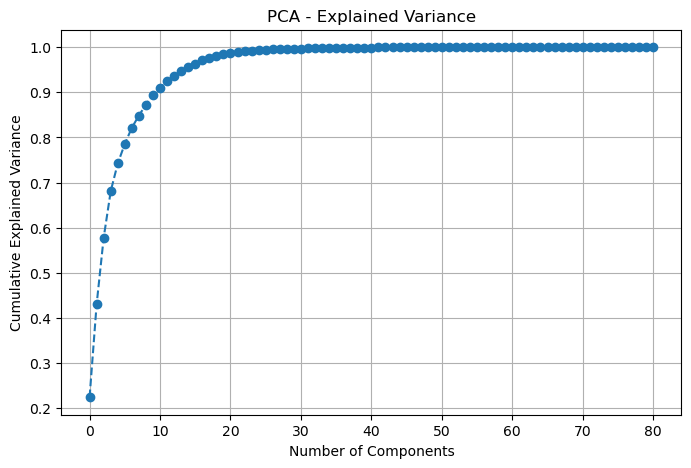

In [216]:
# 1- Preprocessing ofm dataset

# Drop column names with 'info' in them
df_train_ofm = df_train_ofm.drop(columns=[col for col in df_train_ofm.columns if 'info' in col])

# Print NaN values in the DataFrame
print(df_train_ofm.isna().sum())

# Printa column names with NaN values
print(df_train_ofm.columns[df_train_ofm.isna().any()].tolist())

# Remove rows with NaN values and create a new DataFrame
df_train_ofm_for_pca = df_train_ofm.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_train_ofm.shape[0] - df_train_ofm_for_pca.shape[0])

# Print the shape of the new DataFrame
print('number of rows and columns after dropping NaNs:', df_train_ofm_for_pca.shape)
# 2- Preprocessing stoich45 dataset

# Drop columns where the count of zeros is greater than half of the total rows and as new DataFrame
df_train_ofm_for_pca_filtered = df_train_ofm_for_pca.loc[:, (df_train_ofm_for_pca != 0).sum(axis=0) > (df_train_ofm_for_pca.shape[0] / 2)]

df_train_ofm_for_pca_filtered

# 3- Preprocessing

# Select numerical columns for PCA
numerical_cols = df_train_ofm_for_pca_filtered.select_dtypes(include=['float64', 'int64']).columns
df_train_ofm_for_pca_filtered = df_train_ofm_for_pca_filtered[numerical_cols]
df_train_ofm_for_pca_filtered

# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_train_ofm_for_pca_filtered.drop(columns=['outputs.hse06.bandgap'])
y = df_train_ofm_for_pca_filtered['outputs.hse06.bandgap']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio (importance of each component)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative variance to decide number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()

# Get feature importance based on PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_importance = pd.DataFrame(loadings, index=X.columns, columns=[f"PC{i+1}" for i in range(len(explained_variance))])

# Select important features (e.g., features with high loadings in first few PCs)
important_features = feature_importance[abs(feature_importance).sum(axis=1) > 0.5]
print("Important Features based on PCA Loadings:")
print(important_features)





In [217]:
# Print the number and column name of the 20 most important features
print("Number of important features:", important_features.shape[0])
print("Column names of the 20 most important features:", important_features.index[:20].tolist())

# Filter the df_train_ofm DataFrame to keep only the important features
df_train_ofm_filtered = df_train_ofm_for_pca_filtered[important_features.index[:20].tolist()]
df_train_ofm_filtered

Number of important features: 81
Column names of the 20 most important features: ['OFM: s^1 - s^1', 'OFM: s^1 - s^2', 'OFM: s^1 - p^2', 'OFM: s^1 - p^3', 'OFM: s^1 - p^4', 'OFM: s^1 - p^6', 'OFM: s^1 - d^10', 'OFM: s^1 - period 1', 'OFM: s^1 - period 2', 'OFM: s^1 - period 4', 'OFM: s^2 - s^1', 'OFM: s^2 - s^2', 'OFM: s^2 - p^2', 'OFM: s^2 - p^3', 'OFM: s^2 - p^4', 'OFM: s^2 - p^6', 'OFM: s^2 - d^10', 'OFM: s^2 - period 1', 'OFM: s^2 - period 2', 'OFM: s^2 - period 4']


,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4,OFM: s^1 - p^6,OFM: s^1 - d^10,OFM: s^1 - period 1,OFM: s^1 - period 2,OFM: s^1 - period 4,OFM: s^2 - s^1,OFM: s^2 - s^2,OFM: s^2 - p^2,OFM: s^2 - p^3,OFM: s^2 - p^4,OFM: s^2 - p^6,OFM: s^2 - d^10,OFM: s^2 - period 1,OFM: s^2 - period 2,OFM: s^2 - period 4
0,0.093544,0.231142,0.174859,0.004269,0.027510,0.000619,0.000619,0.093544,0.230523,0.000619,0.226480,0.542668,0.343358,0.052449,0.065245,0.031762,0.031762,0.226480,0.510906,0.031762
1,0.097665,0.250352,0.192272,0.018228,0.039189,0.000664,0.000664,0.097665,0.249689,0.000664,0.247597,0.490409,0.358792,0.070073,0.045023,0.016521,0.016521,0.247597,0.473889,0.016521
2,0.079280,0.225983,0.158408,0.000000,0.067257,0.000317,0.000317,0.079280,0.225666,0.000000,0.223294,0.541508,0.429329,0.000000,0.088727,0.023453,0.023453,0.223294,0.518056,0.000000
3,0.040307,0.205369,0.124490,0.012365,0.012152,0.003290,0.003290,0.037017,0.150956,0.003290,0.193671,0.648929,0.409846,0.057989,0.043738,0.031134,0.031134,0.162537,0.540862,0.031134
4,0.180863,0.285742,0.226013,0.010677,0.045445,0.003607,0.003607,0.177256,0.282135,0.000000,0.286440,0.423637,0.334993,0.039336,0.033455,0.015853,0.015853,0.270587,0.407784,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,0.094273,0.224683,0.133746,0.086741,0.000000,0.004196,0.000000,0.094273,0.220487,0.004196,0.222598,0.533450,0.300985,0.154975,0.000000,0.077490,0.000000,0.222598,0.455960,0.077490
8644,0.075643,0.255650,0.157866,0.012736,0.083658,0.001389,0.001389,0.074254,0.252528,0.001389,0.252399,0.544246,0.342391,0.106342,0.068267,0.027247,0.027247,0.225152,0.459338,0.027247
8645,0.016680,0.192066,0.115472,0.076454,0.000000,0.000140,0.000000,0.016680,0.191926,0.000140,0.184147,0.665376,0.160083,0.465065,0.000000,0.040228,0.000000,0.184147,0.625148,0.040228
8646,0.113395,0.291098,0.127221,0.030988,0.132596,0.000000,0.000000,0.113395,0.290805,0.000293,0.289679,0.469099,0.274287,0.067180,0.094402,0.000000,0.000000,0.289679,0.435870,0.033230


## stoich45 + ofm

In [218]:
# Filter df_train_stoich45_ofm_for_pca_filtered DataFrame to keep the columns in df_train_stoich45_filtered and df_train_ofm_filtered, keep 'outputs.hse06.bandgap' column
df_train_stoich45_ofm_combined_filtered = df_train_stoich45_ofm_for_pca_filtered[df_train_stoich45_filtered.columns.tolist() + df_train_ofm_filtered.columns.tolist() + ['outputs.hse06.bandgap']]

# Print the filtered DataFrame
df_train_stoich45_ofm_combined_filtered

,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,period_num_mean,period_num_geometric_mean,...,OFM: s^2 - s^2,OFM: s^2 - p^2,OFM: s^2 - p^3,OFM: s^2 - p^4,OFM: s^2 - p^6,OFM: s^2 - d^10,OFM: s^2 - period 1,OFM: s^2 - period 2,OFM: s^2 - period 4,outputs.hse06.bandgap
0,5.435897,3.685384,4.892668,30.0,10.102564,5.975021,6.511508,17.0,1.717949,1.615866,...,0.542668,0.343358,0.052449,0.065245,0.031762,0.031762,0.226480,0.510906,0.031762,4.988289
1,4.746269,3.268988,4.097117,30.0,9.373134,5.307604,6.491868,16.0,1.656716,1.560265,...,0.490409,0.358792,0.070073,0.045023,0.016521,0.016521,0.247597,0.473889,0.016521,3.196302
2,5.477612,3.613829,7.107613,59.0,10.134328,6.043493,6.448176,19.0,1.731343,1.619219,...,0.541508,0.429329,0.000000,0.088727,0.023453,0.023453,0.223294,0.518056,0.000000,3.617418
3,7.114286,4.942821,5.770721,29.0,11.628571,7.955079,5.923733,17.0,1.942857,1.823680,...,0.648929,0.409846,0.057989,0.043738,0.031134,0.031134,0.162537,0.540862,0.031134,3.220291
4,4.769231,2.906336,6.497382,47.0,8.384615,4.393251,6.613372,16.0,1.615385,1.498079,...,0.423637,0.334993,0.039336,0.033455,0.015853,0.015853,0.270587,0.407784,0.000000,2.436139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,9.611111,5.753521,6.223958,15.0,1.777778,1.649721,...,0.533450,0.300985,0.154975,0.000000,0.077490,0.000000,0.222598,0.455960,0.077490,3.605205
8644,5.651163,3.799867,4.969131,29.0,10.069767,6.045240,6.359009,16.0,1.767442,1.652765,...,0.544246,0.342391,0.106342,0.068267,0.027247,0.027247,0.225152,0.459338,0.027247,3.776886
8645,5.914286,4.491859,4.066388,25.0,11.342857,7.779733,5.786402,15.0,1.828571,1.741101,...,0.665376,0.160083,0.465065,0.000000,0.040228,0.000000,0.184147,0.625148,0.040228,3.880014
8646,4.893617,3.338422,3.668347,20.0,9.276596,5.059334,6.812698,16.0,1.659574,1.556492,...,0.469099,0.274287,0.067180,0.094402,0.000000,0.000000,0.289679,0.435870,0.033230,4.301264


Explained Variance Ratio: [4.16631104e-01 1.66205612e-01 1.01332449e-01 8.55589256e-02
 5.26771715e-02 3.45640419e-02 2.77544598e-02 2.57401416e-02
 1.51370981e-02 1.38025060e-02 1.35000180e-02 9.76022151e-03
 8.33484396e-03 7.43618618e-03 5.90792398e-03 4.32327306e-03
 3.49077628e-03 1.93894251e-03 1.54420748e-03 1.22724548e-03
 1.01798705e-03 8.68655012e-04 5.29696170e-04 2.23381264e-04
 1.78725397e-04 1.41825235e-04 1.04241858e-04 4.13124861e-05
 1.60655388e-05 1.09624418e-05]
Important Features based on PCA Loadings:
                                    PC1       PC2       PC3       PC4  \
atomic_num_mean                0.626301  0.699201  0.125473  0.152220   
atomic_num_geometric_mean      0.916013  0.265924  0.127545 -0.131629   
atomic_num_standard_deviation  0.342496  0.691382  0.160221  0.501081   
atomic_num_max                 0.232520  0.374753  0.194422  0.707334   
group_num_mean                 0.962120 -0.109407  0.158563 -0.076205   
group_num_geometric_mean       0.97

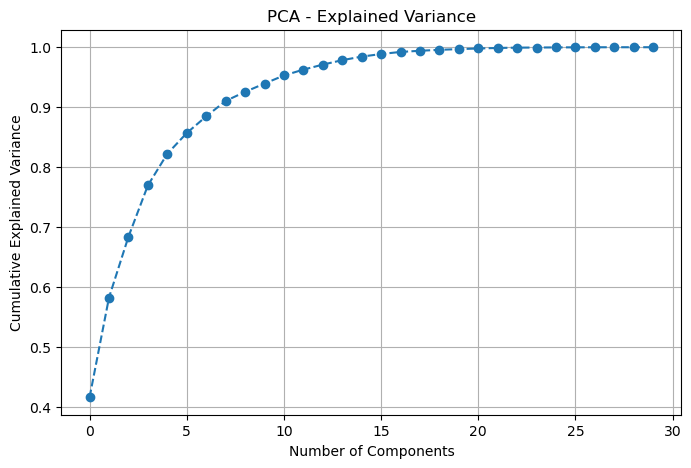

In [219]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X =df_train_stoich45_ofm_combined_filtered .drop(columns=['outputs.hse06.bandgap'])
y = df_train_stoich45_ofm_combined_filtered['outputs.hse06.bandgap']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio (importance of each component)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative variance to decide number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()

# Get feature importance based on PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_importance = pd.DataFrame(loadings, index=X.columns, columns=[f"PC{i+1}" for i in range(len(explained_variance))])

# Select important features (e.g., features with high loadings in first few PCs)
important_features = feature_importance[abs(feature_importance).sum(axis=1) > 0.5]
print("Important Features based on PCA Loadings:")
print(important_features)


In [220]:
# Print the number and column name of the 15 most important features
print("Number of important features:", important_features.shape[0])
print("Column names of the 15 most important features:", important_features.index[:15].tolist())

Number of important features: 30
Column names of the 15 most important features: ['atomic_num_mean', 'atomic_num_geometric_mean', 'atomic_num_standard_deviation', 'atomic_num_max', 'group_num_mean', 'group_num_geometric_mean', 'group_num_standard_deviation', 'group_num_max', 'period_num_mean', 'period_num_geometric_mean', 'OFM: s^1 - s^1', 'OFM: s^1 - s^2', 'OFM: s^1 - p^2', 'OFM: s^1 - p^3', 'OFM: s^1 - p^4']


In [221]:
# Filter the df_train_ofm DataFrame to keep only the important features
df_train_stoich45_ofm_combined_filtered_final = df_train_stoich45_ofm_combined_filtered[important_features.index[:15].tolist()]
df_train_stoich45_ofm_combined_filtered_final

,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,period_num_mean,period_num_geometric_mean,OFM: s^1 - s^1,OFM: s^1 - s^2,OFM: s^1 - p^2,OFM: s^1 - p^3,OFM: s^1 - p^4
0,5.435897,3.685384,4.892668,30.0,10.102564,5.975021,6.511508,17.0,1.717949,1.615866,0.093544,0.231142,0.174859,0.004269,0.027510
1,4.746269,3.268988,4.097117,30.0,9.373134,5.307604,6.491868,16.0,1.656716,1.560265,0.097665,0.250352,0.192272,0.018228,0.039189
2,5.477612,3.613829,7.107613,59.0,10.134328,6.043493,6.448176,19.0,1.731343,1.619219,0.079280,0.225983,0.158408,0.000000,0.067257
3,7.114286,4.942821,5.770721,29.0,11.628571,7.955079,5.923733,17.0,1.942857,1.823680,0.040307,0.205369,0.124490,0.012365,0.012152
4,4.769231,2.906336,6.497382,47.0,8.384615,4.393251,6.613372,16.0,1.615385,1.498079,0.180863,0.285742,0.226013,0.010677,0.045445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,9.611111,5.753521,6.223958,15.0,1.777778,1.649721,0.094273,0.224683,0.133746,0.086741,0.000000
8644,5.651163,3.799867,4.969131,29.0,10.069767,6.045240,6.359009,16.0,1.767442,1.652765,0.075643,0.255650,0.157866,0.012736,0.083658
8645,5.914286,4.491859,4.066388,25.0,11.342857,7.779733,5.786402,15.0,1.828571,1.741101,0.016680,0.192066,0.115472,0.076454,0.000000
8646,4.893617,3.338422,3.668347,20.0,9.276596,5.059334,6.812698,16.0,1.659574,1.556492,0.113395,0.291098,0.127221,0.030988,0.132596


<div class="alert alert-block alert-info">
<b>SN:</b> There are 15 columns retained from both feature sets according to separate stoich45 and ofm PCA, followed by combining residual columns.
</div>

In [222]:
# Check if df_train_stoich45_ofm_initial has column names with 'info' in them
info_columns = [col for col in df_train_stoich45_ofm_initial.columns if 'info' in col]
print("Columns with 'info' in df_train_stoich45_ofm_initial:", info_columns)



Columns with 'info' in df_train_stoich45_ofm_initial: ['info.mofid.smiles_nodes', 'info.mofid.smiles_linkers', 'info.mofid.smiles', 'info.natoms', 'info.pld', 'info.lcd', 'info.density', 'info.volume']


In [223]:
# Filter df_train_stoich45_ofm DataFrame to keep the columns in df_train_stoich45_ofm_combined_filtered, keep 'outputs.hse06.bandgap' and column names with 'info' in them
df_train_stoich45_ofm_combined_final = df_train_stoich45_ofm_initial[df_train_stoich45_ofm_combined_filtered_final.columns.tolist() + ['outputs.hse06.bandgap'] + info_columns]

# Print the filtered DataFrame
df_train_stoich45_ofm_combined_final

,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,period_num_mean,period_num_geometric_mean,...,OFM: s^1 - p^4,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume
0,5.435897,3.685384,4.892668,30.0,10.102564,5.975021,6.511508,17.0,1.717949,1.615866,...,0.027510,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880
1,4.746269,3.268988,4.097117,30.0,9.373134,5.307604,6.491868,16.0,1.656716,1.560265,...,0.039189,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968
2,5.477612,3.613829,7.107613,59.0,10.134328,6.043493,6.448176,19.0,1.731343,1.619219,...,0.067257,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082
3,7.114286,4.942821,5.770721,29.0,11.628571,7.955079,5.923733,17.0,1.942857,1.823680,...,0.012152,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244
4,4.769231,2.906336,6.497382,47.0,8.384615,4.393251,6.613372,16.0,1.615385,1.498079,...,0.045445,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,5.722222,3.714647,5.747517,28.0,9.611111,5.753521,6.223958,15.0,1.777778,1.649721,...,0.000000,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932
8644,5.651163,3.799867,4.969131,29.0,10.069767,6.045240,6.359009,16.0,1.767442,1.652765,...,0.083658,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574
8645,5.914286,4.491859,4.066388,25.0,11.342857,7.779733,5.786402,15.0,1.828571,1.741101,...,0.000000,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981
8646,4.893617,3.338422,3.668347,20.0,9.276596,5.059334,6.812698,16.0,1.659574,1.556492,...,0.132596,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985


<div class="alert alert-block alert-info">
<b>SN:</b> There are 15 columns retained (excluding 'info' and 'band gap' columns) from both feature sets according to separate stoich45 and ofm PCA, followed by combining residual columns.
</div>